In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import  DateFormatter
import numpy as np


In [2]:
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'

In [5]:
#Import the data

data_wti = pd.read_csv('wti-weekly_csv.xls',index_col=0,parse_dates=True)
data_inflacion =  pd.read_excel (r'ajuste inflacion usa (1).xlsx',index_col=0,parse_dates=True)



In [6]:
#Replace the oil price for the updated value to 2014
total_years = data_wti.index.year.unique()[:-6]
data_wti['updated_price'] = data_wti['Price']
for year in total_years:
    #Loc. the inflation factor
    year_inflation  = data_inflacion.loc[str(year),'indice'][0]
    mask_year = data_wti.index.year == year
    #Create a new column with the updated price.
    data_wti['updated_price'][mask_year] = data_wti['Price'][mask_year] * year_inflation



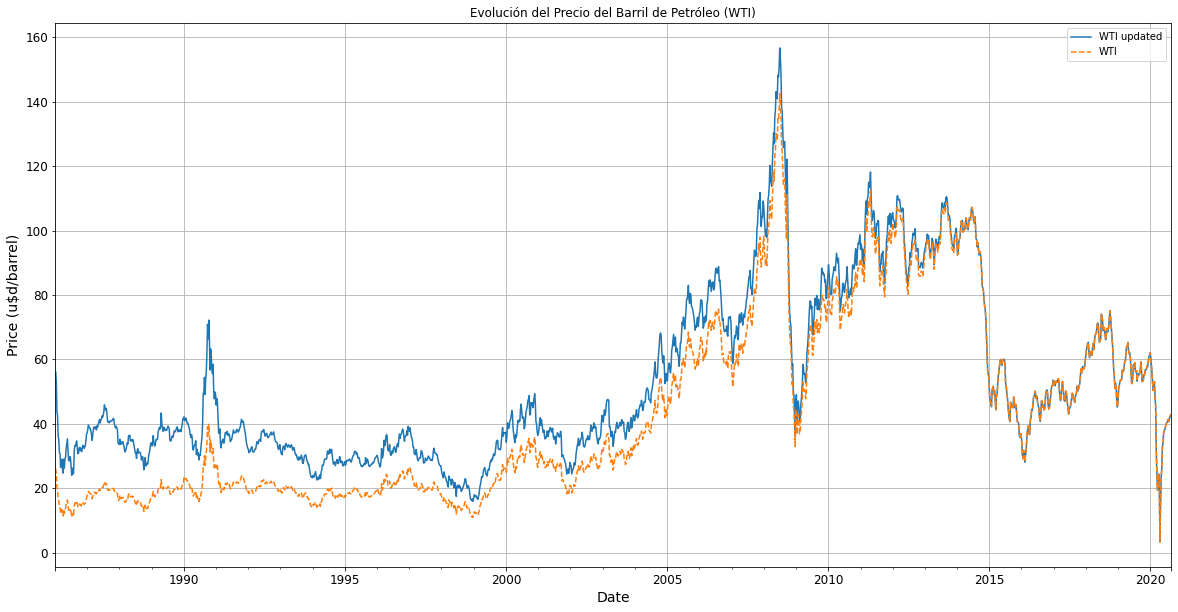

In [7]:
#Plot oil price vs updated oil price
fig,ax = plt.subplots(figsize=(20,10))
data_wti['updated_price'].plot(label='WTI updated')
data_wti['Price'].plot(label='WTI',linestyle='--')
ax.set(ylabel='Price (u$d/barrel)',title='Evolución del Precio del Barril de Petróleo (WTI)')
plt.legend()
ax.grid(True)